In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [30]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Dropping irrelevant columns

In [4]:
data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
from sklearn import preprocessing


In [8]:
# label encoding
categorical_cols=['Geography','Gender']
le=LabelEncoder()
for i in categorical_cols:
    data[i]=le.fit_transform(data[i])
data.dtypes 

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
x = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [11]:
model= keras.models.Sequential([
    keras.layers.Dense(6,input_shape=(10,)), #input
    keras.layers.Dense(32) ,#1
    keras.layers.Dense(32),#2
    keras.layers.Dense(1,activation='sigmoid')])#output

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,379
Trainable params: 1,379
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)


Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 516.1091 - accuracy: 0.6409 - val_loss: 607.6917 - val_accuracy: 0.4755
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 324.3593 - accuracy: 0.6445 - val_loss: 483.3091 - val_accuracy: 0.7120
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 246.1619 - accuracy: 0.6497 - val_loss: 480.6738 - val_accuracy: 0.7960
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 219.8460 - accuracy: 0.6482 - val_loss: 230.3841 - val_accuracy: 0.5450
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 170.6344 - accuracy: 0.6522 - val_loss: 150.1243 - val_accuracy: 0.4710
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 193.3637 - accuracy: 0.6599 - val_loss: 139.5040 - val_accuracy: 0.7975
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 173.3270 - accuracy: 0.6576 - val_loss: 133.0208 -

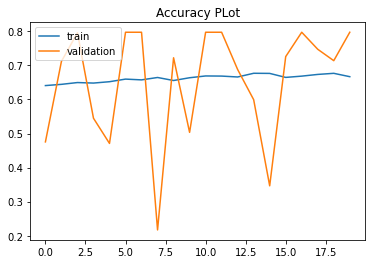

In [13]:
#  ACCURACY PLOT

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy PLot')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

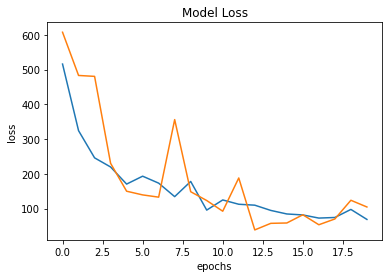

In [14]:
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [24]:
predictions = model.predict(x_test)
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [26]:
y_predictions = []

for yp in predictions:
    if yp>0.6:
        y_predictions.append(1)
    else:
        y_predictions.append(0)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_predictions)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [29]:
ac = accuracy_score(y_test,y_predictions)
ac

0.7975

### THANK YOU!!